!pip install gspread pandas oauth2client
# Install the GQL library
!pip install gql
!pip gspread-dataframe


### Instructions for Importing and Installing Libraries

Before you start working with the data, ensure that you have the necessary libraries installed and imported. This notebook uses the following libraries:

1. **pandas**: A powerful data manipulation and analysis library.
2. **gspread**: A Python API for Google Sheets.
3. **oauth2client**: A library for OAuth 2.0 authentication.

To install these libraries, run the following commands:

```python
!pip install gspread pandas oauth2client
# Install the gql library
!pip install gql
!pip gspread-dataframe
```

After installing the libraries, import them in your code:

```python
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pandas as pd
```
```
##########################################################################

In [1]:
import gspread  # Import gspread for Google Sheets API
from oauth2client.service_account import ServiceAccountCredentials  # Import ServiceAccountCredentials for OAuth2
import pandas as pd  # Import pandas for data manipulation



### Connecting and Authentication with Google Sheets API and Service Credentials

To connect and authenticate with Google Sheets using the API and service credentials, follow these steps:

1. **Define the Scope**: Specify the scope of the API access. This determines what level of access your application has to the Google Sheets.

2. **Add Credentials to the Account**: Use the service account credentials JSON file to authenticate your application. This file contains the necessary information to authorize your application.

3. **Authorize the Client**: Use the credentials to authorize the client, allowing it to interact with the Google Sheets API.

4. **Share the Spreadsheet**: Ensure that the service account email has access to the spreadsheet. You can share the spreadsheet with the service account email.



### Configuring Service Account and Google Sheets API

To work with Google Sheets API using a service account, follow these steps:

#### 1. Create a Project in Google Cloud Console
1. Go to the [Google Cloud Console](https://console.cloud.google.com/).
2. Click on the project drop-down and select **New Project**.
3. Enter the project name and click **Create**.

#### 2. Enable the Google Sheets and Google Drive APIs
1. In the Google Cloud Console, go to the **APIs & Services** > **Library**.
2. Search for "Google Sheets API" and click on it, then click **Enable**.
3. Similarly, search for "Google Drive API" and enable it.

#### 3. Create Credentials for the Service Account
1. Go to **APIs & Services** > **Credentials**.
2. Click on **Create Credentials** and select **Service Account**.
3. Fill in the service account details and click **Create**.
4. In the **Service account permissions** (optional) step, click **Continue**.
5. In the **Grant users access to this service account** step, click **Done**.
6. Click on the created service account, then go to the **Keys** tab.
7. Click on **Add Key** > **Create New Key** and select **JSON**. This will download the credentials file to your computer.

#### 4. Upload `unicorn_companies.xlsx` to Google Sheets
1. Open [Google Sheets](https://sheets.google.com/).
2. Click on the **+** button to create a new spreadsheet.
3. Go to **File** > **Import**.
4. Select the **Upload** tab and drag your `unicorn_companies.xlsx` file into the window.
5. Choose the import settings and click **Import data**.

#### 5. Share the Spreadsheet with the Service Account
1. Open the Google Sheet you just created.
2. Click on the **Share** button in the top right corner.
3. Enter the email address of the service account (found in the JSON credentials file) and give it **Editor** access.
4. Click **Send**.

#### 6. Download the Service Account Credentials
Ensure you have downloaded the JSON file containing the service account credentials. This file will be used to authenticate your application and access the Google Sheets API.

By following these steps, you will have configured your Google Cloud project, enabled the necessary APIs, created a service account, uploaded your data to Google Sheets, and shared the spreadsheet with the service account.


### Downloading Credentials and Setting Up the Path

To authenticate and connect to the Google Sheets API, you need to download the credentials file and place it in the appropriate directory. Follow these steps:

1. **Download the Credentials File**:
    - Go to the Google Cloud Console and navigate to your project.
    - Under **APIs & Services** > **Credentials**, locate your service account.
    - Click on the service account and go to the **Keys** tab.
    - Click on **Add Key** > **Create New Key** and select **JSON**. This will download the credentials file to your computer.

2. **Move the Credentials File**:
    - Move the downloaded JSON credentials file to the `lab2` folder in your project directory.

3. **Update the Path in Your Code**:
    - Ensure that the path to the credentials file is correctly specified in your code. For example:
    ```python
    creds = ServiceAccountCredentials.from_json_keyfile_name('lab2/your_credentials_file.json', scope)
    ```

By following these steps, you will have the credentials file in the correct location and the path updated in your code to authenticate and connect to the Google Sheets API.


In [2]:
# Define the scope
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]

# Add credentials to the account
creds = ServiceAccountCredentials.from_json_keyfile_name('D:\Trainings\Python for data analytics\labs\python-for-data-visualization-553c0b31744b.json', scope)

# Authorize the clientsheet 
client = gspread.authorize(creds)

# Ensure the service account email has access to the spreadsheet
# Share the spreadsheet with the service account email: pdv-2-235@python-for-data-visualization.iam.gserviceaccount.com

 
### Reading Data from Google Sheet and Loading into Pandas DataFrame

In this section, we will read data from a Google Sheet and load it into a pandas DataFrame. This involves the following steps:

1. **Get the Instance of the Spreadsheet**: Use the `client` object to open the spreadsheet by its key.
2. **Get the Worksheet**: Access the specific worksheet within the spreadsheet.
3. **Get All Records**: Retrieve all the records from the worksheet.
4. **Convert to DataFrame**: Convert the retrieved records (in JSON format) into a pandas DataFrame for further analysis and manipulation.

 

In [27]:



# Get the instance of the Spreadsheet
sheet = client.open_by_key('1ULxX-VESlcAlcNWXWqLf4NVwcaRM0jiTKlCf_Tvip9c')

# Get the first sheet of the Spreadsheet
worksheet = sheet.get_worksheet(0)

# Get all the records of the data
records = worksheet.get_all_records()

# Convert the json to dataframe
df = pd.DataFrame.from_dict(records)

# Display the dataframe
print(df)

      company_id           company           country  valuation    funding
0           1075  Sample Company 1  Sample Country 1   66227591  400000000
1           1076  Sample Company 2  Sample Country 2   44695433  500000000
2            556        Cloudinary     United States   56762502  100000000
3            999             PLACE     United States    4528469  100000000
4            396         candy.com     United States    6277949  100000000
...          ...               ...               ...        ...        ...
1069        1002            Poizon             China   72245076          0
1070         215            SSENSE            Canada   36381477          0
1071         866          Assembly     United States   30228854          0
1072         651          Xiaobing             China   89238201          0
1073         890      Carson Group     United States   38326889          0

[1074 rows x 5 columns]



### Basic Operations: Filtering DataFrame

In this section, we will perform basic operations such as filtering the DataFrame. Filtering is a common operation used to subset the data based on certain conditions. For example, we can filter the DataFrame to include only companies with a valuation greater than 1 billion and funding greater than 100 million.


To perform these operations, we can use the following common pandas functions:

- **Selecting Columns**: To select specific columns from the DataFrame.
    ```python
    selected_columns = df[['company', 'valuation', 'funding']]
    ```

- **Filtering Rows**: To filter rows based on a condition.
    ```python
    filtered_df = df[(df['valuation'] > 1_000_000_000) & (df['funding'] > 100_000_000)]
    ```

- **Sorting Data**: To sort the DataFrame by a specific column.
    ```python
    sorted_df = df.sort_values(by='valuation', ascending=False)
    ```

- **Appending Data**: To append new rows to the DataFrame.
    ```python
    new_data = {'company': 'NewCo', 'valuation': 500_000_000, 'funding': 50_000_000, 'country': 'USA'}
    df = df.append(new_data, ignore_index=True)
    ```

- **Grouping Data**: To group the DataFrame by a specific column and perform an aggregate function.
    ```python
    grouped_df = df.groupby('country').sum()
    ```

These functions allow us to manipulate and analyze the data effectively.

In [24]:
# Example: Filter companies with valuation greater than 1 billion and funding greater than 100 million
filtered_df = df[(df['valuation'] > 1_000_000_000) & (df['funding'] > 100_000_000)]

# Display the filtered dataframe
print(filtered_df)

Empty DataFrame
Columns: [company_id, company, country, valuation, funding]
Index: []



### Creating Dashboard using Matplotlib and Pandas DataFrame from Google Sheet Data

In this section, we will create a dashboard to visualize the data from the Google Sheet using Matplotlib and Pandas. The dashboard will include various plots to provide insights into the data, such as:

1. **Top 10 Companies by Valuation**: A horizontal bar chart showing the top 10 companies based on their valuation.
2. **Top 10 Companies by Funding**: A pie chart representing the top 10 companies based on their funding.
3. **Valuation Distribution by Country**: A bar chart displaying the total valuation distribution across different countries.
4. **Funding Distribution by Country**: A line chart illustrating the total funding distribution across different countries.

These visualizations will help in understanding the distribution and comparison of valuations and funding among different companies and countries.


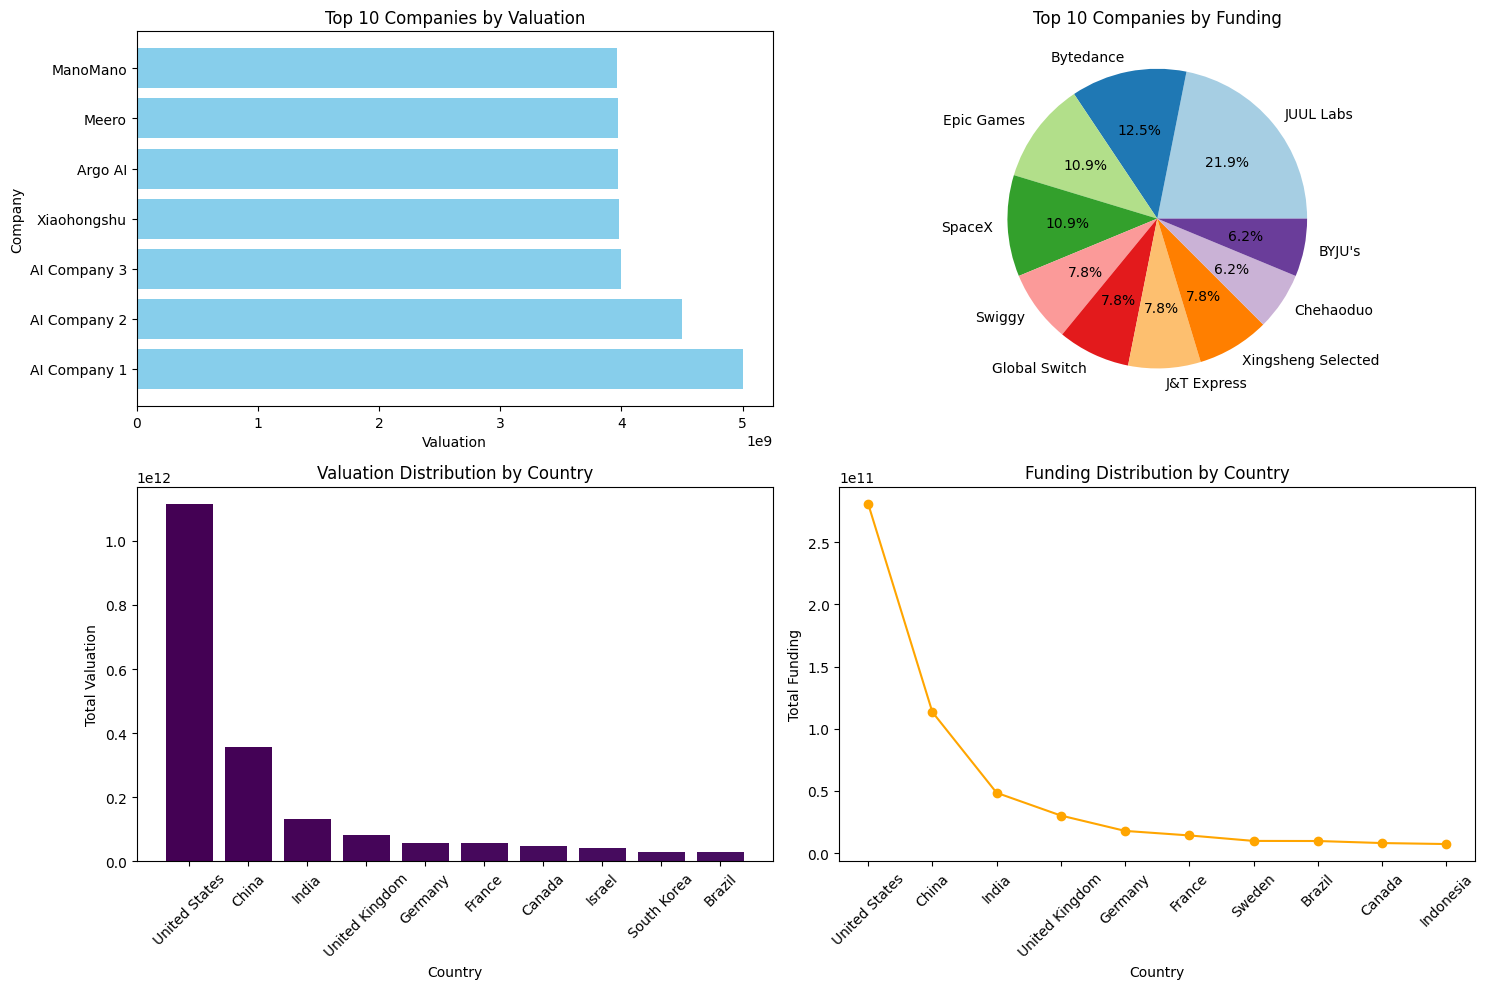

In [43]:
import matplotlib.pyplot as plt

def create_dashboard(df):
    # Create a figure and a set of subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Plot 1: Top 10 Companies by Valuation (Horizontal Bar Chart)
    top_valuation = df.nlargest(10, 'valuation')
    axs[0, 0].barh(top_valuation['company'], top_valuation['valuation'], color='skyblue')
    axs[0, 0].set_title('Top 10 Companies by Valuation')
    axs[0, 0].set_xlabel('Valuation')
    axs[0, 0].set_ylabel('Company')
 

    # Plot 2: Top 10 Companies by Funding (Pie Chart)
    top_funding = df.nlargest(10, 'funding')
    axs[0, 1].pie(top_funding['funding'], labels=top_funding['company'], autopct='%1.1f%%', colors=plt.cm.Paired(range(len(top_funding))))
    axs[0, 1].set_title('Top 10 Companies by Funding')

    # Plot 3: Valuation Distribution by Country (Bar Chart with Different Colors)
    country_valuation = df.groupby('country')['valuation'].sum().sort_values(ascending=False).head(10)
    colors = plt.cm.viridis(range(len(country_valuation)))
    axs[1, 0].bar(country_valuation.index, country_valuation.values, color=colors)
    axs[1, 0].set_title('Valuation Distribution by Country')
    axs[1, 0].set_xlabel('Country')
    axs[1, 0].set_ylabel('Total Valuation')
    axs[1, 0].tick_params(axis='x', rotation=45)

    # Plot 4: Funding Distribution by Country (Line Chart)
    country_funding = df.groupby('country')['funding'].sum().sort_values(ascending=False).head(10)
    axs[1, 1].plot(country_funding.index, country_funding.values, marker='o', linestyle='-', color='orange')
    axs[1, 1].set_title('Funding Distribution by Country')
    axs[1, 1].set_xlabel('Country')
    axs[1, 1].set_ylabel('Total Funding')
    axs[1, 1].tick_params(axis='x', rotation=45)

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Call the function with the dataframe
create_dashboard(df)


In [ ]:
!pip install gspread-dataframe

In [37]:
import numpy as np
from gspread_dataframe import set_with_dataframe


# Generate random valuations between 1,000,000 and 1,200,000
# Generate random valuations between 1,000,000 and 3,990,000,000
df['valuation'] = np.random.randint(1_000_000, 3_990_000_000, size=len(df), dtype=np.int64)
   
# Display the updated dataframe
print(df)

# Update the Google Sheet with the modified DataFrame
set_with_dataframe(worksheet, df)

      company_id           company           country   valuation    funding
0           1075  Sample Company 1  Sample Country 1  3931570669  400000000
1           1076  Sample Company 2  Sample Country 2  2649982414  500000000
2            556        Cloudinary     United States   861755602  100000000
3            999             PLACE     United States  2599309285  100000000
4            396         candy.com     United States  2488596213  100000000
...          ...               ...               ...         ...        ...
1069        1002            Poizon             China  1606123592          0
1070         215            SSENSE            Canada  3482198438          0
1071         866          Assembly     United States  2829153060          0
1072         651          Xiaobing             China  1608900324          0
1073         890      Carson Group     United States    26704361          0

[1074 rows x 5 columns]


In [40]:
# New AI companies data
new_ai_companies = {
    'company_id': [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
    'company': ['AI Company 1', 'AI Company 2', 'AI Company 3', 'AI Company 4', 'AI Company 5', 
                'AI Company 6', 'AI Company 7', 'AI Company 8', 'AI Company 9', 'AI Company 10'],
    'country': ['USA', 'Canada', 'UK', 'Germany', 'France', 'China', 'India', 'Japan', 'South Korea', 'Australia'],
    'valuation': [5000000000, 4500000000, 4000000000, 3500000000, 3000000000, 
                  2500000000, 2000000000, 1500000000, 1000000000, 900000000],
    'funding': [1000000000, 900000000, 800000000, 700000000, 600000000, 
                500000000, 400000000, 300000000, 200000000, 100000000]
}

# Convert the dictionary to a DataFrame
new_ai_df = pd.DataFrame(new_ai_companies)

# Append the new AI companies to the existing DataFrame
df = pd.concat([df, new_ai_df], ignore_index=True)

# Display the updated DataFrame
print(df)

# Update the Google Sheet with the modified DataFrame
set_with_dataframe(worksheet, df)

      company_id           company           country   valuation    funding
0           1075  Sample Company 1  Sample Country 1  3931570669  400000000
1           1076  Sample Company 2  Sample Country 2  2649982414  500000000
2            556        Cloudinary     United States   861755602  100000000
3            999             PLACE     United States  2599309285  100000000
4            396         candy.com     United States  2488596213  100000000
...          ...               ...               ...         ...        ...
1089        2006      AI Company 6             China  2500000000  500000000
1090        2007      AI Company 7             India  2000000000  400000000
1091        2008      AI Company 8             Japan  1500000000  300000000
1092        2009      AI Company 9       South Korea  1000000000  200000000
1093        2010     AI Company 10         Australia   900000000  100000000

[1094 rows x 5 columns]


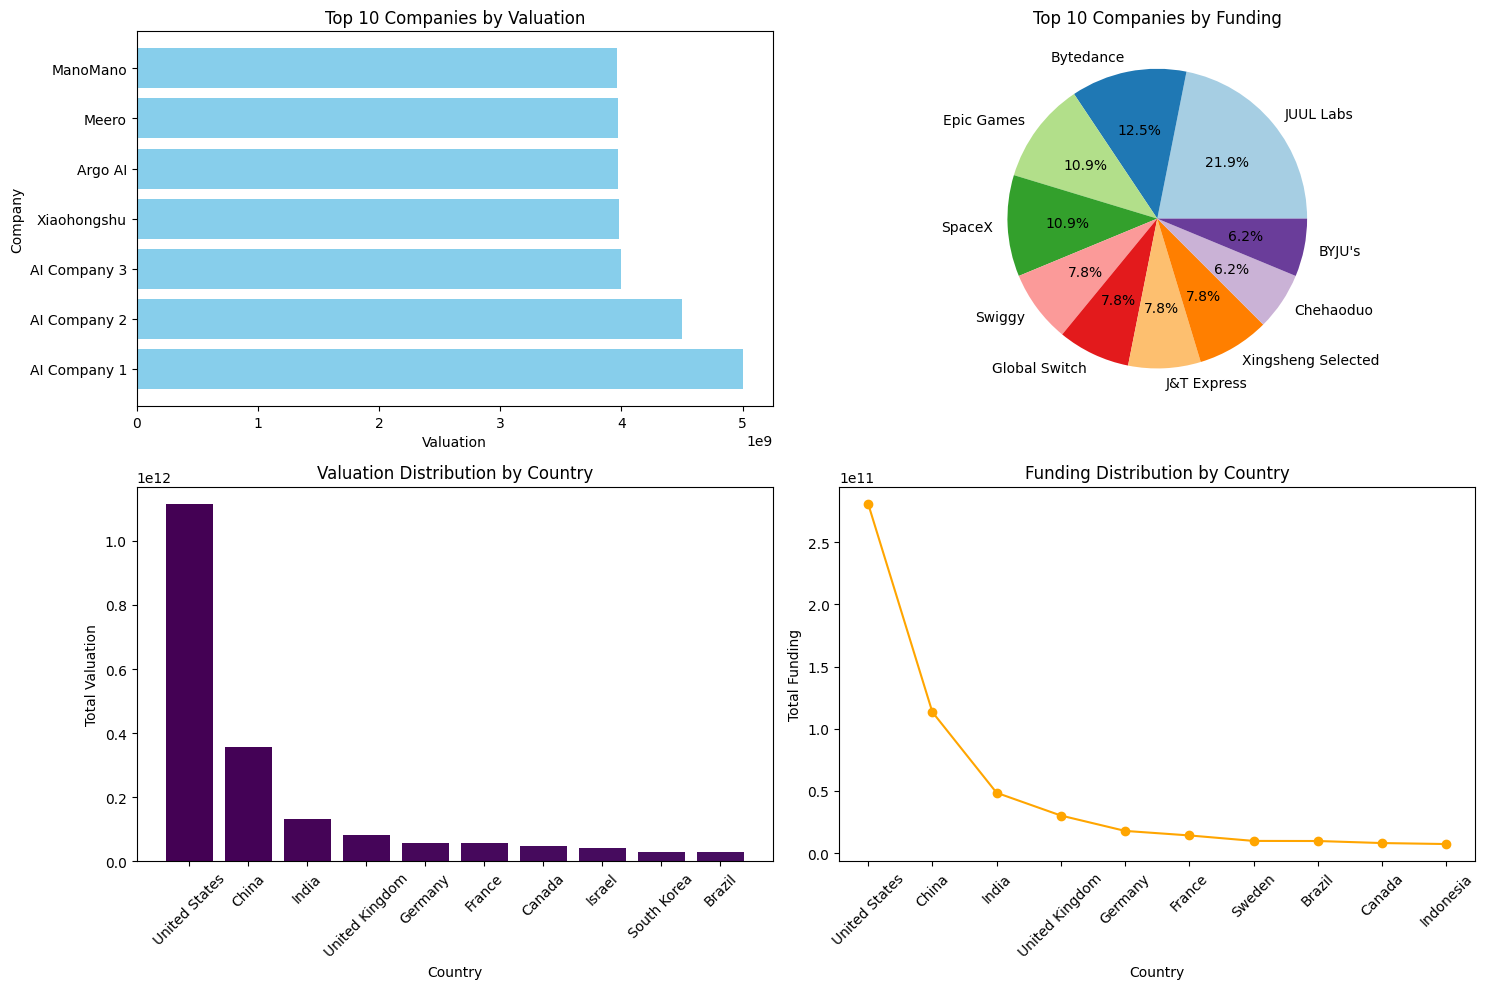

In [44]:



# Get the instance of the Spreadsheet
sheet = client.open_by_key('1ULxX-VESlcAlcNWXWqLf4NVwcaRM0jiTKlCf_Tvip9c')

# Get the first sheet of the Spreadsheet
worksheet = sheet.get_worksheet(0)

# Get all the records of the data
records = worksheet.get_all_records()

# Convert the json to dataframe
df = pd.DataFrame.from_dict(records)

# Call the function with the dataframe
create_dashboard(df)